# <font color='green'> DSCI 100 - GROUP 85: GROUP PROJECT PROPOSAL </font>
## <font color='green'> CREDIT DEFAULT CLASSIFICATION </font>

### <font color='navy'> I. Introduction </font>


+ Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
+ Clearly state the question you will try to answer with your project
+ Identify and describe the dataset that will be used to answer the question

This past year, Canada’s inflation rate reached a 30-year high of 5.7% (Evans, 2022). In turn, the increase in cost of living has caused 6.4% increase in credit balances (Senett, 2022). Without a comparable increase in wages, Canadians are at a greater risk of credit card default. Credit default occurs when an individual misses the minimum payment due for six months (Bucci, 2022). Credit default has vast ramifications including weak credit scores and lawsuits.

By exploring precursors to credit default, individuals become equipped to identify warning signs. The following question arises: will an individual default on their credit payment? 

The “Default of Credit Card Clients” dataset from the UC Irvine Machine Learning Repository allows us to answer this question. It provides data on an individual’s age, sex, highest level of education obtained, marital status, amount of given credit, history of past payments, bill statement amounts, previous payment amounts, and most importantly, whether this individual had defaulted. 

<font color='red'> add a photo </font>

### <font color='navy'> II. Preliminary Exploratory Data Analysis </font>

#### <font color='fushsia'> Read the dataset

We first start by loading library packages

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(cowplot)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

At first glance, the original dataset with 30,000 rows and 25 columns appears as below:

In [2]:
credit_data <- read_csv('data/default of credit card clients.csv', skip=1)
credit_data

Rows: 30000 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
29998,30000,1,2,2,37,4,3,2,-1,⋯,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,⋯,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,⋯,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


#### <font color='fushsia'> Clean and wrangle the data </font>

While the original data format is tidy, there are still improvements can be made.

+ First, to provide viewers with a better understanding of the data, we renamed the columns to demonstrate which months they represents. 
+ In addition, we changed the DEFAULT column data type to factor, as this would be our responsive variable for this project
+ To allow faster loading time while not significantly sacrifycing our model accuracy, we decided to select a sample of 15,000 rows for analysis
+ Finally, to prepare for our predictive model, we split our data into training and testing data

The table below shows our training data set, with 11,249 rows and 25 columns

In [3]:
set.seed(1)

#TIDY THE DATA

tidy_credit_data <- credit_data |>
rename(BILL_SEPT = BILL_AMT1,
       BILL_AUG = BILL_AMT2,
       BILL_JUL = BILL_AMT3,
       BILL_JUN = BILL_AMT4,
       BILL_MAY = BILL_AMT5,
       BILL_APR = BILL_AMT6,
       PAY_SEPT = PAY_AMT1,
       PAY_AUG = PAY_AMT2,
       PAY_JUL = PAY_AMT3,
       PAY_JUN = PAY_AMT4,
       PAY_MAY = PAY_AMT5,
       PAY_APR = PAY_AMT6,
       DEFAULT = "default payment next month") |>

mutate(DEFAULT= as_factor(DEFAULT)) |>
slice_sample(n = 15000) 

#SPLIT DATA INTO TRAINING AND TESTING

credit_split <- initial_split(tidy_credit_data,
                              prop = 0.75, 
                              strata = DEFAULT)
credit_train <- training(credit_split)
credit_test <- testing (credit_split)

credit_train

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,DEFAULT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
17401,200000,2,1,1,49,-1,-1,-1,-1,⋯,950,0,1900,950,950,950,0,1900,950,0
24388,320000,1,1,1,40,-1,-1,-1,-1,⋯,8240,15273,16106,8240,8240,8240,15273,16106,9690,0
13218,320000,2,1,1,42,1,2,2,0,⋯,252323,253557,256525,10000,450,7025,7161,8000,6883,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
10831,10000,1,2,2,22,2,0,0,-1,⋯,528,0,0,1238,1275,528,0,0,0,1
25859,140000,2,2,1,37,-1,-1,-1,-1,⋯,1516,326,1439,326,326,1516,326,1439,326,1
14693,170000,1,2,1,34,1,2,2,2,⋯,64363,55912,54500,3400,0,3957,0,2200,1300,1


#### <font color='fushsia'> Summary Statistics </font>

Looking at the Default / Non Default summary table, we can see that: 
+ The majority of credit card clients (~78%) pay up their bills, hence Non-Default (DEFAULT = 0)
+ 22% of clients default on their credit cards (DEFAULT = 1)
+ There are no missing values in the training data

In [4]:
#SUMMARIZE DEFAULT/NON DEFAULT 

num_obs <- nrow(credit_train)
credit_train |>
group_by(DEFAULT) |>
summarize(count = n(), percentage = n() / num_obs * 100)

#CHECK FOR NA VALUES

sum(is.na(credit_train))


DEFAULT,count,percentage
<fct>,<int>,<dbl>
0,8740,77.6958
1,2509,22.3042


[1] 0

To take a look at the average of bill statement and payment amount from April to September, we have compiled the table as below.
From the summary data, it appears that the majority of bills over the months are paid off, a sign showing that
most credit card users pay their bills 

<font color='red'> Should we make this a 2 column tables????????????????????? </font>

In [5]:
#SUMMARIZE BILL AND PAYMENT 

average_summarize <- credit_train |>
select(BILL_SEPT:PAY_APR) |>
map_df(mean, na.rm=TRUE) 
average_summarize 

average_summarize_bill <- average_summarize |>
pivot_longer(cols = BILL_SEPT:BILL_APR,
             names_to = "Month",
             values_to = "Amount") |>
select(Month:Amount)
average_summarize_bill

average_summarize_pay <- average_summarize |>
pivot_longer(cols = PAY_SEPT:PAY_APR,
             names_to = "Month",
             values_to = "Amount") |>
select(Month:Amount)
average_summarize_pay

BILL_SEPT,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52078.22,50029.63,48032.24,44312.64,41349.74,39731.71,5788.625,5940.109,5254.558,4861.044,4661.477,5126.886


Month,Amount
<chr>,<dbl>
BILL_SEPT,52078.22
BILL_AUG,50029.63
BILL_JUL,48032.24
BILL_JUN,44312.64
BILL_MAY,41349.74
BILL_APR,39731.71


Month,Amount
<chr>,<dbl>
PAY_SEPT,5788.625
PAY_AUG,5940.109
PAY_JUL,5254.558
PAY_JUN,4861.044
PAY_MAY,4661.477
PAY_APR,5126.886


#### <font color='fushsia'> Visualization </font>

To illustrate the distribution of Default and Non Default Credit, we created a scatter plot with x axis being September bill statement and y axis being September payment amount, with class being Default (1) or Non Default (0).

From the graph, it appears that credit defaults are more dominent in clients with low payment amount, regardless of their bill statement. Attempts to plot bill statement and payment amount of other months show a similar observation.

<font color = 'red'> Still need to scale the x and y. HOW??? </font>

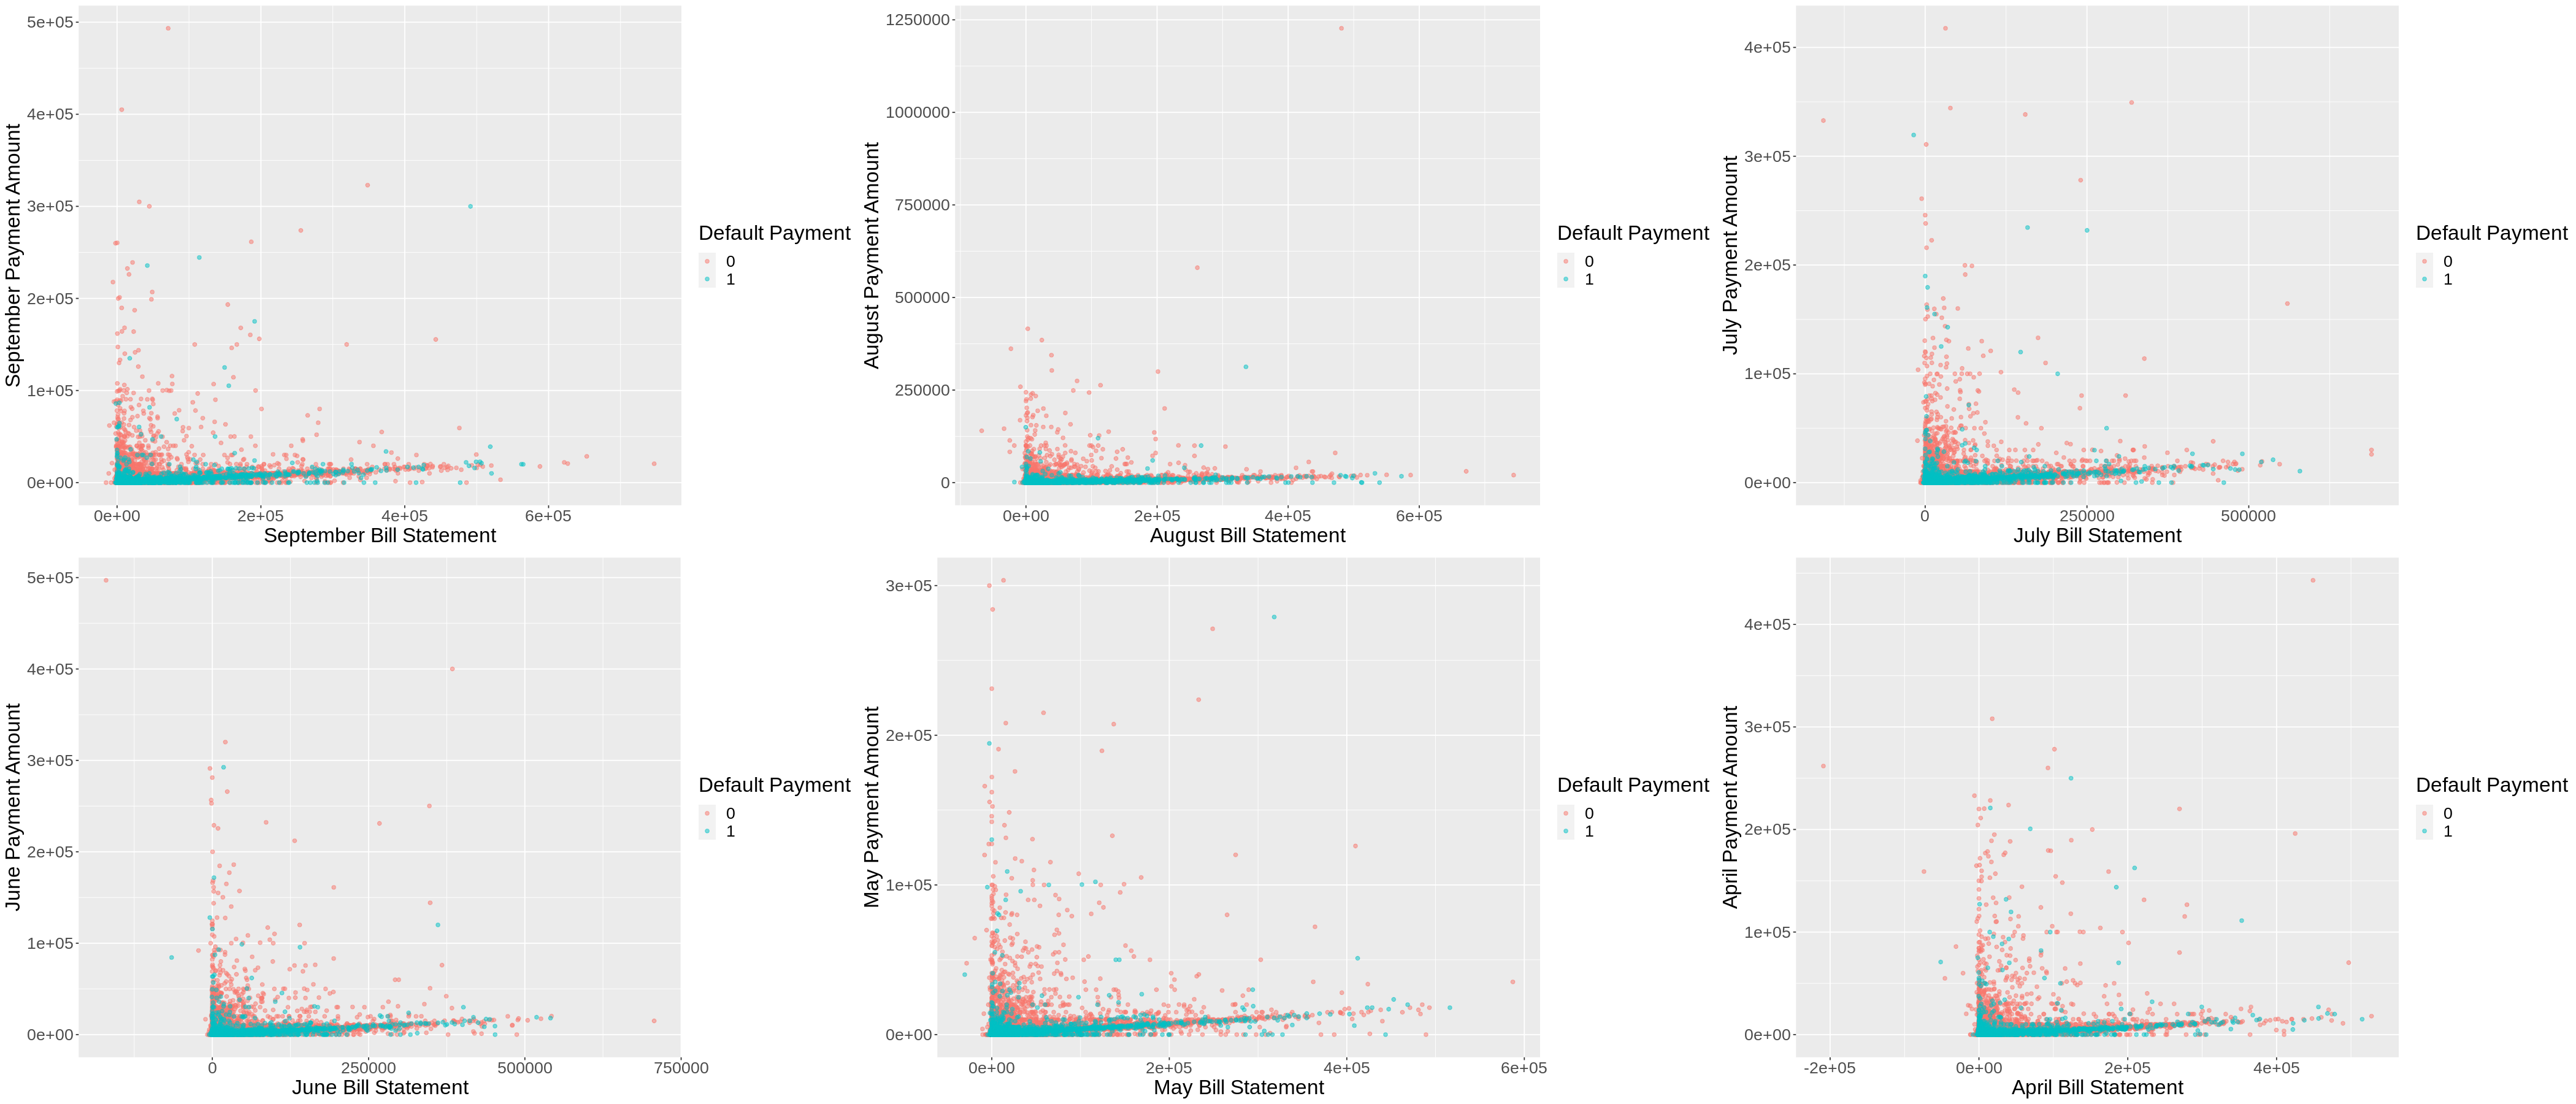

In [6]:
#VISUALIZATION

options(repr.plot.width = 35, repr.plot.height = 15)

sept_bill_vs_payment <- credit_train |>
ggplot(aes(x = BILL_SEPT, y = PAY_SEPT, color = DEFAULT)) +
geom_point(alpha = 0.5) +
labs(x = "September Bill Statement", 
     y = "September Payment Amount", 
     color = "Default Payment") +
theme(text = element_text(size = 20))
# sept_bill_vs_payment

aug_bill_vs_payment <- credit_train |>
ggplot(aes(x = BILL_AUG, y = PAY_AUG, color = DEFAULT)) +
geom_point(alpha = 0.5) +
labs(x = "August Bill Statement", 
     y = "August Payment Amount", 
     color = "Default Payment") +
theme(text = element_text(size = 20))

jul_bill_vs_payment <- credit_train |>
ggplot(aes(x = BILL_JUL, y = PAY_JUL, color = DEFAULT)) +
geom_point(alpha = 0.5) +
labs(x = "July Bill Statement", 
     y = "July Payment Amount", 
     color = "Default Payment") +
theme(text = element_text(size = 20))

jun_bill_vs_payment <- credit_train |>
ggplot(aes(x = BILL_JUN, y = PAY_JUN, color = DEFAULT)) +
geom_point(alpha = 0.5) +
labs(x = "June Bill Statement", 
     y = "June Payment Amount", 
     color = "Default Payment") +
theme(text = element_text(size = 20))

may_bill_vs_payment <- credit_train |>
ggplot(aes(x = BILL_MAY, y = PAY_MAY, color = DEFAULT)) +
geom_point(alpha = 0.5) +
labs(x = "May Bill Statement", 
     y = "May Payment Amount", 
     color = "Default Payment") +
theme(text = element_text(size = 20))

apr_bill_vs_payment <- credit_train |>
ggplot(aes(x = BILL_APR, y = PAY_APR, color = DEFAULT)) +
geom_point(alpha = 0.5) +
labs(x = "April Bill Statement", 
     y = "April Payment Amount", 
     color = "Default Payment") +
theme(text = element_text(size = 20))

plot_grid(sept_bill_vs_payment, aug_bill_vs_payment,
          jul_bill_vs_payment, jun_bill_vs_payment,
          may_bill_vs_payment, apr_bill_vs_payment,
          label_size = 12)

# source: https://cran.r-project.org/web/packages/cowplot/vignettes/introduction.html

# general visualization
# attach(credit_train)
# par(mfrow=c(2,2))
# plot(BILL_SEPT, PAY_SEPT, main = "Scatterplot of September Bill vs. Payment")
# plot(BILL_AUG, PAY_AUG, main = "Scatterplot of August Bill vs. Payment")
# plot(BILL_JUL, PAY_JUL, main = "Scatterplot of July Bill vs. Payment")
# plot(BILL_JUN, PAY_JUN, main = "Scatterplot of June Bill vs. Payment")
# plot(BILL_MAY, PAY_MAY, main = "Scatterplot of May Bill vs. Payment")
# plot(BILL_APR, PAY_APR, main = "Scatterplot of April Bill vs. Payment")

# source: https://www.statmethods.net/advgraphs/ggplot2.html

# tweaked graph with differnt scales
# sept_bill_vs_payment2 <- credit_train |>
# ggplot(aes(x = BILL_SEPT, y = PAY_SEPT, color = DEFAULT)) +
# geom_point(alpha = 0.5) +
# labs(x = "September Bill Statement", 
#      y = "September Payment Amount", 
#      color = "Default Payment") +
# scale_x_log10() +
# scale_y_log10()+
# theme(text = element_text(size = 20))

# sept_bill_vs_payment2

# sept_bill_vs_payment3 <- credit_train |>
# ggplot(aes(x = BILL_SEPT, y = PAY_SEPT, color = DEFAULT)) +
# geom_point(alpha = 0.5) +
# labs(x = "September Bill Statement", 
#      y = "September Payment Amount", 
#      color = "Default Payment") +
# scale_x_continuous() +
# scale_y_continuous()+
# theme(text = element_text(size = 20))

# sept_bill_vs_payment3

<font color ='red'> Should we us this graph? it does not look like a classification graph??? </font>

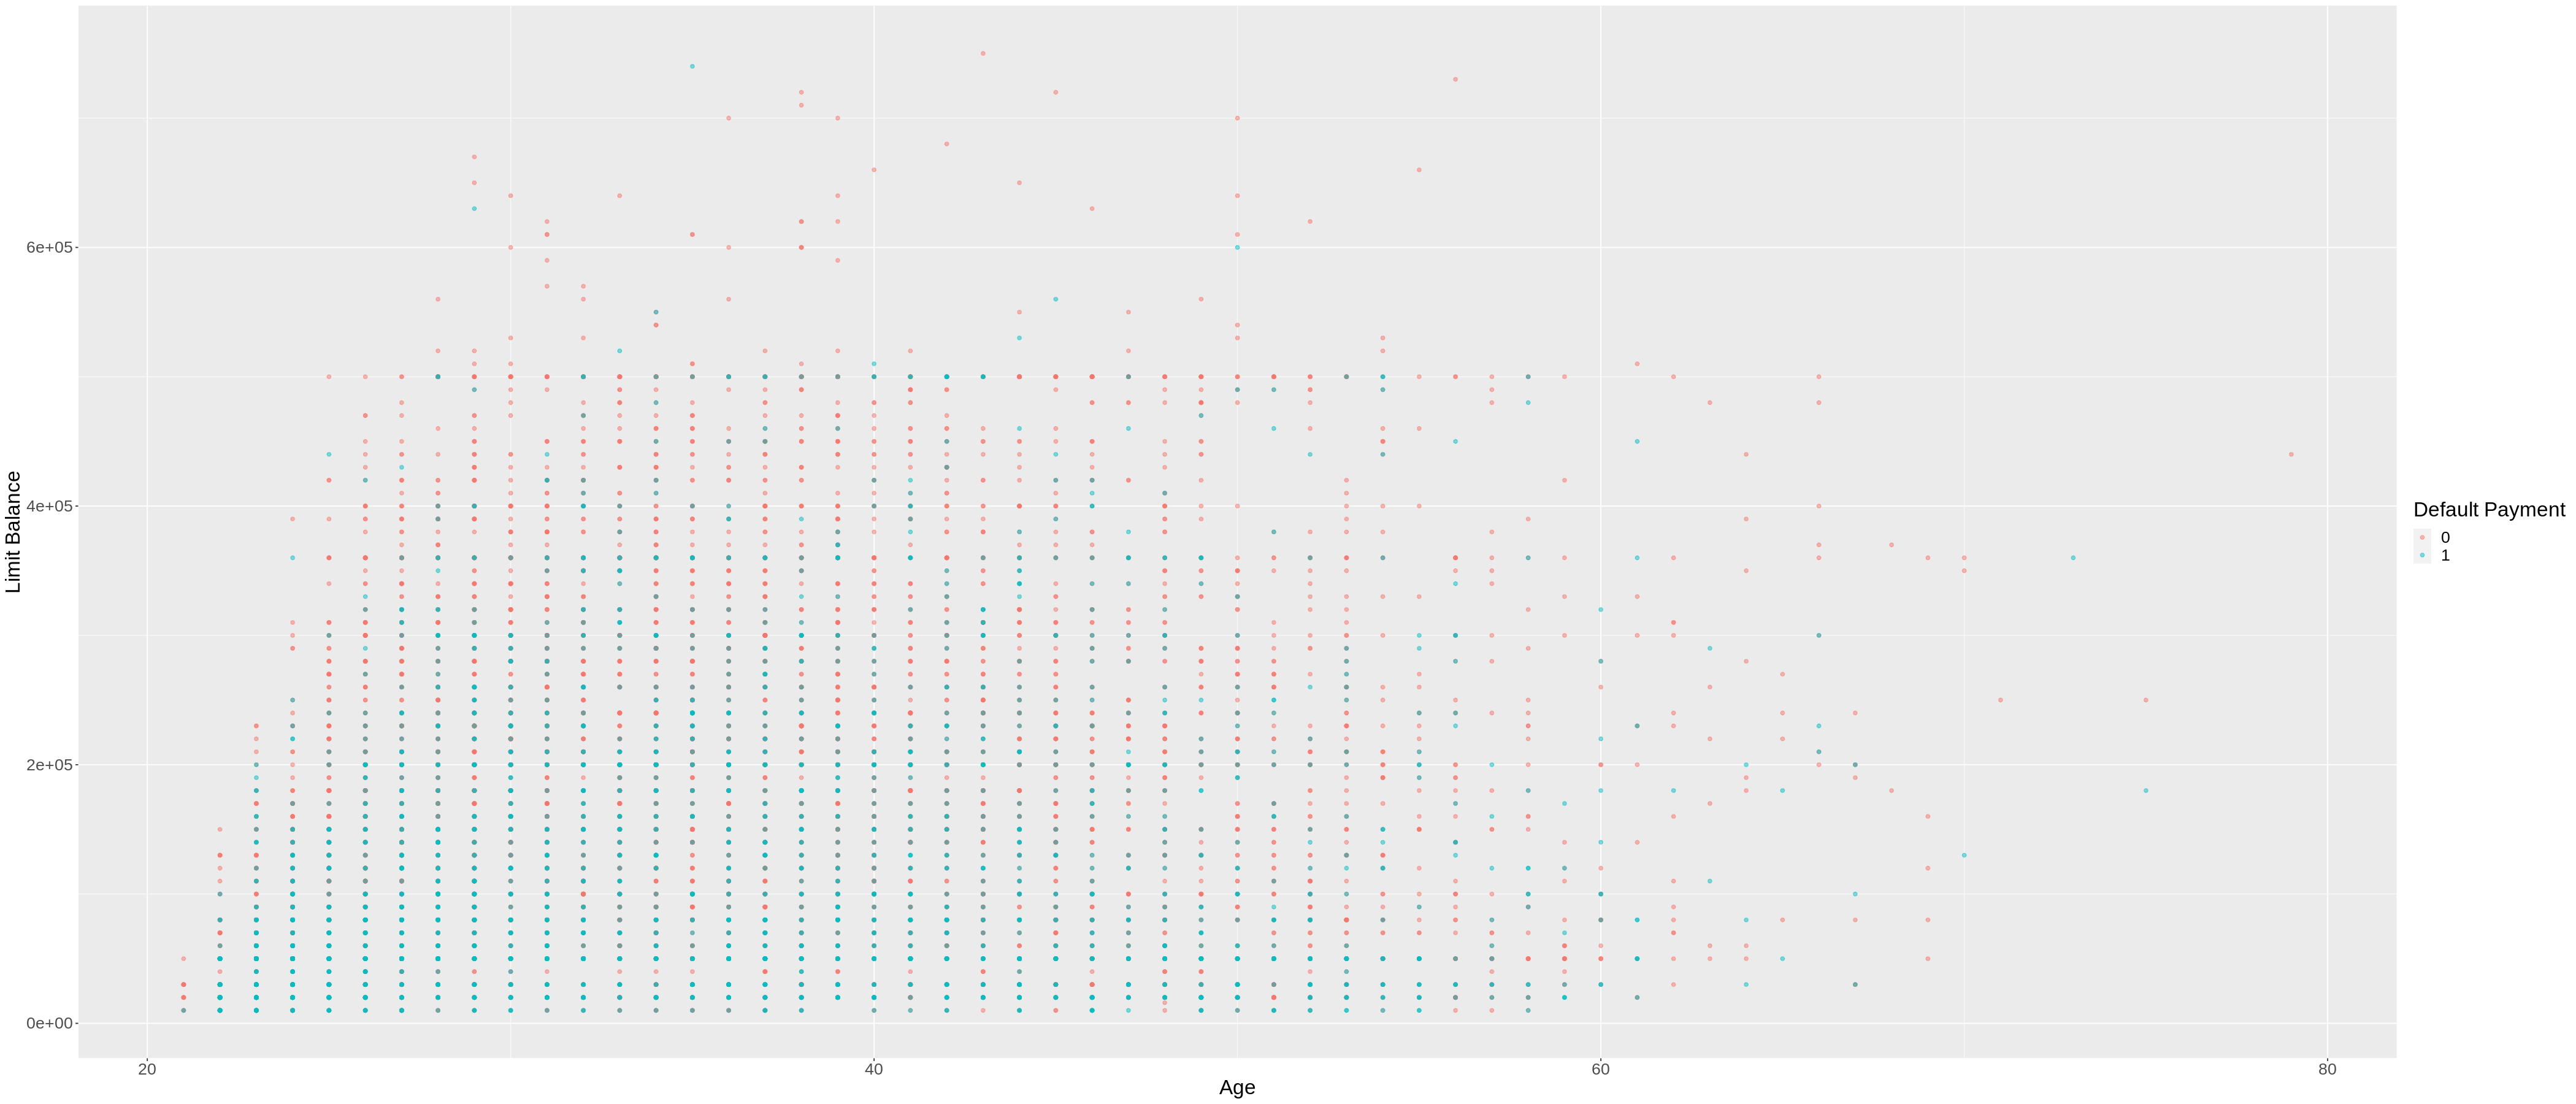

In [7]:
LIM <- credit_train |>
ggplot(aes(x = AGE, y = LIMIT_BAL, color = DEFAULT)) +
geom_point(alpha = 0.5) +
labs(x = "Age", 
     y = "Limit Balance", 
     color = "Default Payment") +
theme(text = element_text(size = 20))

LIM

### <font color='navy'> III. Method </font>

#Stephanie 

Explain how you will conduct either your data analysis and which variables/columns you will use. 
Note - you do not need to use all variables/columns that exist in the raw data set. 
In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

Describe at least one way that you will visualize the results


### <font color='navy'> VI. Expected outcomes and significance </font>

#Aaron

What do you expect to find?

What impact could such findings have?

What future questions could this lead to?